<h2><b>Input : </b></h2>

*   train_microarray.csv

<h2><b>Output : </b></h2>

* rf1_features.pkl
* rf2_features.pkl
* rf3_features.pkl
* ab1_features.pkl
* ab2_features.pkl
* ab3_features.pkl


# Run All

## Import dan Load

Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import joblib

Mengatur Style

In [ ]:
rcParams['figure.figsize'] = 15, 10
mpl.style.use(['ggplot'])

Load Dataset berupa Data Train

In [ ]:
df_train = pd.read_csv('https://drive.google.com/uc?id=1MiU_0V6-LvZ_CyCuWf2HoW-WXNKSIFJQ')

Melihat Dataset

In [ ]:
df_train.head()

,211612_s_at,206628_at,222339_x_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,207283_at,219233_s_at,213326_at,...,208938_at,208566_at,207723_s_at,219777_at,222150_s_at,209100_at,205699_at,201547_at,211069_s_at,Label
0,2.535743,2.509137,2.477981,2.457776,2.052387,2.873506,2.285882,2.257423,2.828750,2.432269,...,2.000653,1.908920,1.670529,1.976986,2.538606,2.852094,1.812555,1.926493,2.900288,1
1,2.587822,2.751712,2.437972,2.408562,1.957657,2.779933,2.248177,2.158378,2.655283,2.439049,...,2.000948,1.931161,1.588826,1.657637,2.380881,2.798405,1.852201,1.901823,2.934622,1
2,2.529666,2.787718,2.558234,2.447706,2.059190,2.805088,2.255567,2.223798,2.724081,2.459016,...,1.705573,1.917374,1.609536,1.585730,2.390935,2.809363,2.005320,2.009139,2.858905,0
3,2.274739,2.487072,2.602525,2.537130,2.273920,2.952965,2.554384,2.275782,2.876030,2.520870,...,1.936551,1.923020,1.610778,1.627205,2.278927,2.790865,1.939110,1.977171,2.952043,0
4,2.551101,2.501445,2.675678,2.692597,2.321532,2.887101,2.752609,2.239391,2.718403,2.503886,...,1.859982,1.990585,1.636428,1.860937,2.351503,2.799492,1.846797,2.093768,2.894002,0


Melihat Ukuran Dataset

In [ ]:
df_train.shape

(130, 22216)

## Reduksi Fitur Standard Deviation

Visualisasi Simpangan Baku setiap Kolom/Fitur

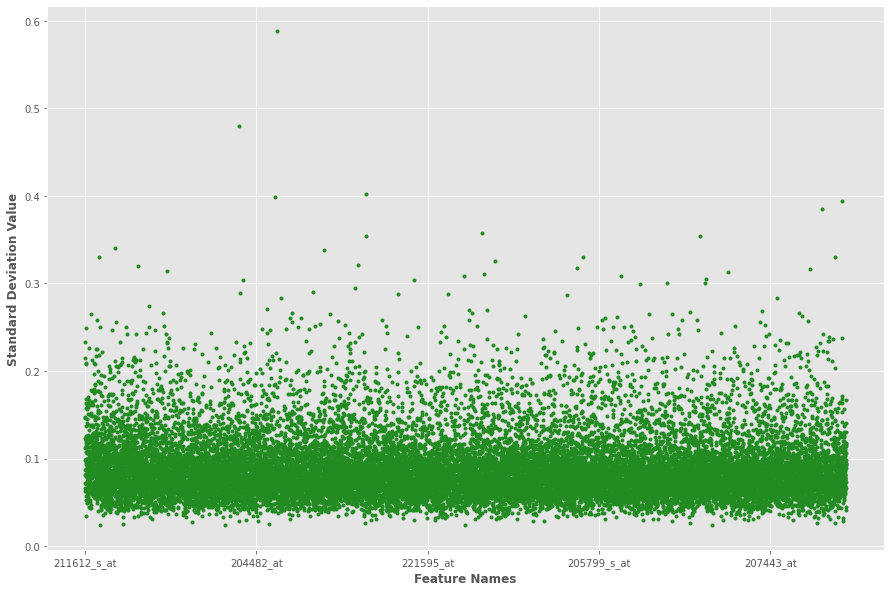

In [ ]:
df_train.iloc[:,:-1].std().plot(style='.', color='forestgreen')
plt.xlabel('Feature Names', fontweight='bold')
plt.ylabel('Standard Deviation Value', fontweight='bold')
plt.show()

Memfilter Kolom dengan Simpangan Baku < 0.1 dan menghasilkan list berupa index-index dari kolom yang akan didrop

In [ ]:
simpangan_baku = df_train.iloc[:,:-1].std()
drop_kolom_index = []

for i in range(0,len(simpangan_baku)):
  if (simpangan_baku[i] < 0.1):
    drop_kolom_index.append(i)

print(len(drop_kolom_index))

16509


Mengubah index yang akan didrop tersebut menjadi nama kolom

In [ ]:
drop_kolom = []

for i in range(0,len(drop_kolom_index)):
  drop_kolom.append(df_train.columns[drop_kolom_index[i]])

print(len(drop_kolom))

16509


Ukuran setelah melakukan Drop

In [ ]:
df_train.drop(columns=drop_kolom, inplace=True)
df_train.shape

(130, 5707)

Visualisasi setelah dilakukan drop

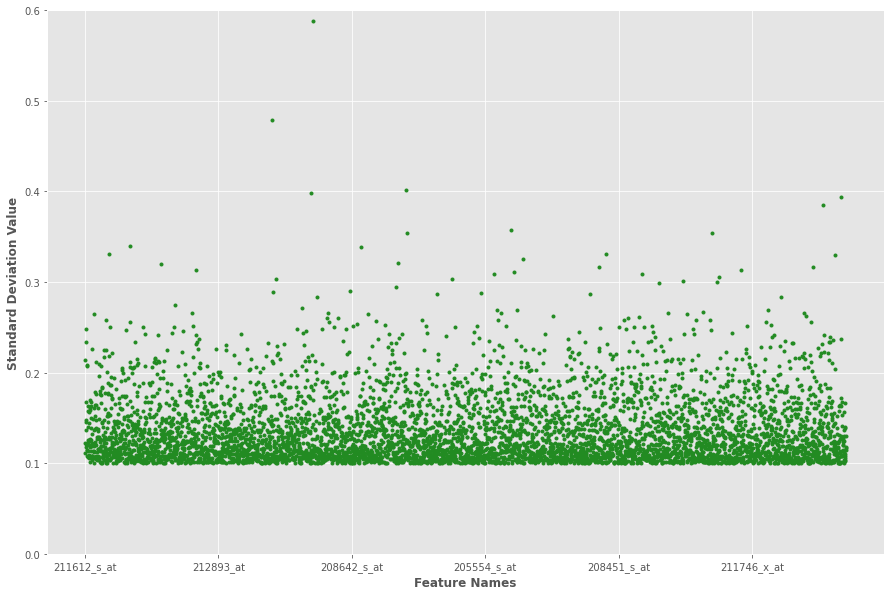

In [ ]:
df_train.iloc[:,:-1].std().plot(style='.', color='forestgreen')
plt.xlabel('Feature Names', fontweight='bold')
plt.ylabel('Standard Deviation Value', fontweight='bold')
plt.ylim(0,0.6)
plt.show()

## Split X_train dan y_train

Melakukan Split untuk X_train dan y_train

In [ ]:
X = df_train.iloc[:,:-1]
X.head()

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,209703_x_at,216609_at,...,205978_at,220394_at,212055_at,203460_s_at,217783_s_at,204971_at,209395_at,208938_at,219777_at,222150_s_at
0,2.535743,2.457776,2.052387,2.873506,2.285882,2.518572,2.656989,2.833421,2.448979,1.982433,...,1.635546,1.696228,2.724899,2.789691,3.078939,3.367350,1.766702,2.000653,1.976986,2.538606
1,2.587822,2.408562,1.957657,2.779933,2.248177,2.508590,2.366057,2.871436,2.460372,2.139794,...,1.619527,1.667691,2.772350,2.775073,3.123781,3.267103,1.813445,2.000948,1.657637,2.380881
2,2.529666,2.447706,2.059190,2.805088,2.255567,2.658405,2.542071,2.871085,2.435954,2.113104,...,1.785995,1.766007,2.499228,2.743806,3.017190,3.297073,1.861616,1.705573,1.585730,2.390935
3,2.274739,2.537130,2.273920,2.952965,2.554384,2.736684,2.465318,2.988069,2.551221,2.204011,...,1.732963,1.806890,2.705551,2.538612,3.057966,3.011900,1.817295,1.936551,1.627205,2.278927
4,2.551101,2.692597,2.321532,2.887101,2.752609,2.752873,2.608392,3.098642,2.643402,2.483343,...,1.712801,1.753526,2.646272,2.565008,3.049509,3.370768,2.066245,1.859982,1.860937,2.351503


In [ ]:
y = df_train.iloc[:,-1]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Label, dtype: int64

## Seleksi Fitur

### Select KBest 

Menentukan nilai K

In [ ]:
nilai_k = [100,200,300,400,500,600,700,800,900,1000]

Chi2

In [ ]:
list_fitur = []

for k in nilai_k:
  seleksi_chi2 = SelectKBest(score_func=chi2, k=k)
  hasil_chi2 = seleksi_chi2.fit(X,y)
  list_fitur.append(list(hasil_chi2.get_feature_names_out()))

for i in range(0,len(list_fitur)):
  for j in range(0,len(list_fitur[i])):
    if (list_fitur[i][j] == 'Label'):
      print(i,j)

Pembuatan Model

In [ ]:
rf_seleksi = RandomForestClassifier()
ab_seleksi = AdaBoostClassifier()

rf_akurasi = []
ab_akurasi = []

### Random Forest

Nilai Akurasi Cross Val pada masing-masing K

In [ ]:
print("====================RANDOM FOREST====================")
for i in range(0,len(nilai_k)):
  score = cross_val_score(rf_seleksi, X[list_fitur[i]], y, scoring="accuracy", cv=10)
  print("\nNilai K=" + str(nilai_k[i]))
  print("Akurasi masing-masing = ")
  print(score)
  print("Rata-rata = ", score.mean())
  rf_akurasi.append(score.mean())

====================RANDOM FOREST====================

Nilai K=100
Akurasi masing-masing = 
[0.46153846 0.84615385 0.84615385 0.61538462 0.61538462 0.84615385
 0.92307692 0.76923077 0.84615385 0.53846154]
Rata-rata =  0.7307692307692307

Nilai K=200
Akurasi masing-masing = 
[0.53846154 0.76923077 0.76923077 0.53846154 0.46153846 0.69230769
 0.92307692 0.92307692 0.76923077 0.53846154]
Rata-rata =  0.6923076923076923

Nilai K=300
Akurasi masing-masing = 
[0.61538462 0.76923077 0.84615385 0.61538462 0.46153846 0.84615385
 0.92307692 0.84615385 0.92307692 0.61538462]
Rata-rata =  0.7461538461538462

Nilai K=400
Akurasi masing-masing = 
[0.61538462 0.84615385 0.84615385 0.53846154 0.46153846 0.69230769
 0.92307692 0.84615385 0.84615385 0.46153846]
Rata-rata =  0.7076923076923076

Nilai K=500
Akurasi masing-masing = 
[0.61538462 0.84615385 0.76923077 0.53846154 0.69230769 0.76923077
 0.84615385 0.92307692 0.84615385 0.46153846]
Rata-rata =  0.7307692307692307

Nilai K=600
Akurasi masing-mas

Menyimpan Top 3 Features

In [ ]:
top3_rf_index = sorted(range(len(rf_akurasi)), key=lambda i: rf_akurasi[i])[-3:]
top3_rf_index.sort()

rf1_features = list_fitur[top3_rf_index[0]]
rf2_features = list_fitur[top3_rf_index[1]]
rf3_features = list_fitur[top3_rf_index[2]]

print("Banyak fitur terpilih pada Random Forest: ")
for i in range(0, len(top3_rf_index)):
  print("RF" + str(i+1) + " =", nilai_k[top3_rf_index[i]])

Banyak fitur terpilih pada Random Forest: 
RF1 = 300
RF2 = 600
RF3 = 900


### AdaBoost

Nilai Akurasi Cross val pada masing-masing K

In [ ]:
print("====================ADABOOST====================")
for i in range(0,len(nilai_k)):
  score = cross_val_score(ab_seleksi, X[list_fitur[i]], y, scoring="accuracy", cv=10)
  print("\nNilai K=" + str(nilai_k[i]))
  print("Akurasi masing-masing = ")
  print(score)
  print("Rata-rata = ", score.mean())
  ab_akurasi.append(score.mean())

====================ADABOOST====================

Nilai K=100
Akurasi masing-masing = 
[0.69230769 0.76923077 0.69230769 0.61538462 0.30769231 0.76923077
 0.76923077 0.92307692 0.84615385 0.61538462]
Rata-rata =  0.7

Nilai K=200
Akurasi masing-masing = 
[0.84615385 0.76923077 0.53846154 0.46153846 0.61538462 0.69230769
 0.92307692 0.84615385 0.84615385 0.69230769]
Rata-rata =  0.723076923076923

Nilai K=300
Akurasi masing-masing = 
[0.69230769 0.61538462 0.61538462 0.46153846 0.61538462 0.76923077
 0.92307692 0.84615385 0.69230769 0.46153846]
Rata-rata =  0.6692307692307693

Nilai K=400
Akurasi masing-masing = 
[0.76923077 0.76923077 0.61538462 0.53846154 0.61538462 0.69230769
 0.84615385 0.76923077 0.76923077 0.30769231]
Rata-rata =  0.6692307692307693

Nilai K=500
Akurasi masing-masing = 
[0.61538462 0.84615385 0.46153846 0.38461538 0.61538462 0.61538462
 0.84615385 0.84615385 0.84615385 0.46153846]
Rata-rata =  0.653846153846154

Nilai K=600
Akurasi masing-masing = 
[0.53846154 0.7

In [ ]:
top3_ab_index = sorted(range(len(ab_akurasi)), key=lambda i: ab_akurasi[i])[-3:]
top3_ab_index.sort()

ab1_features = list_fitur[top3_ab_index[0]]
ab2_features = list_fitur[top3_ab_index[1]]
ab3_features = list_fitur[top3_ab_index[2]]

print("Banyak fitur terpilih pada AdaBoost: ")
for i in range(0, len(top3_ab_index)):
  print("AB" + str(i+1) + " =", nilai_k[top3_ab_index[i]])

Banyak fitur terpilih pada AdaBoost: 
AB1 = 100
AB2 = 200
AB3 = 700


### Visualisasi Akurasi Cross Val Model terhadap Banyak Fitur

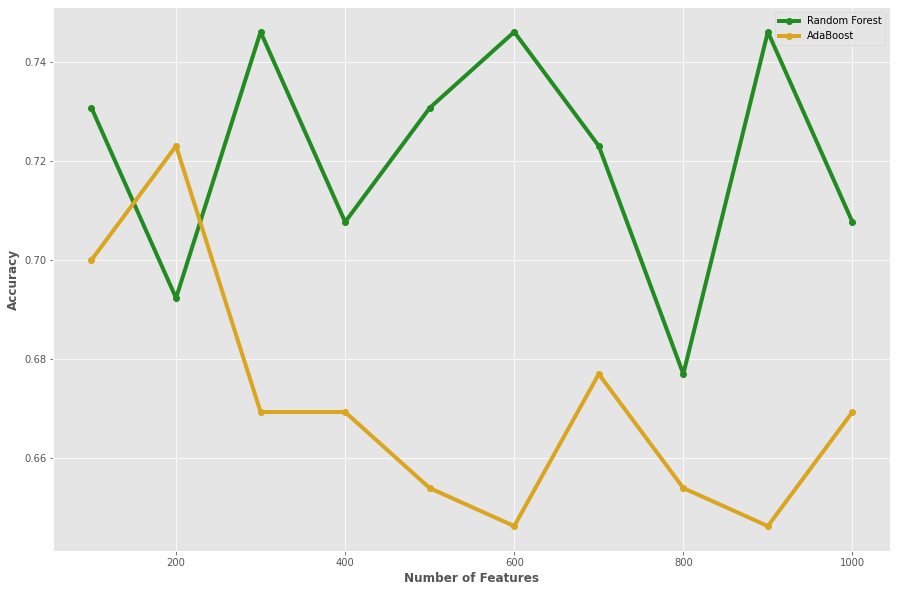

In [ ]:
plt.plot(nilai_k, rf_akurasi, linewidth=4, marker='o', color='forestgreen')
plt.plot(nilai_k, ab_akurasi, linewidth=4, marker='o', color='goldenrod')
plt.xlabel('Number of Features', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.legend(['Random Forest', 'AdaBoost'])
plt.show()

Append dengan Label

In [ ]:
rf1_features.append('Label')
rf2_features.append('Label')
rf3_features.append('Label')
ab1_features.append('Label')
ab2_features.append('Label')
ab3_features.append('Label')

Menjamin agar tidak ada nama yang sama

In [ ]:
rf1_features = list(dict.fromkeys(rf1_features))
rf2_features = list(dict.fromkeys(rf2_features))
rf3_features = list(dict.fromkeys(rf3_features))
ab1_features = list(dict.fromkeys(ab1_features))
ab2_features = list(dict.fromkeys(ab2_features))
ab3_features = list(dict.fromkeys(ab3_features))

Banyak kolom (termasuk Label)

In [ ]:
print(len(rf1_features))
print(len(rf2_features))
print(len(rf3_features))
print(len(ab1_features))
print(len(ab2_features))
print(len(ab3_features))

301
601
901
101
201
701


Melihat contoh Dataframe yang sudah diseleksi fitur

In [ ]:
df_feature = df_train[rf3_features]
df_feature.head()

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,209703_x_at,216609_at,...,203290_at,210064_s_at,213668_s_at,202173_s_at,43544_at,201324_at,216841_s_at,206149_at,205681_at,Label
0,2.535743,2.457776,2.052387,2.873506,2.285882,2.518572,2.656989,2.833421,2.448979,1.982433,...,2.234970,3.122554,2.321798,2.154980,2.740056,1.712145,2.341958,3.059717,2.352974,1
1,2.587822,2.408562,1.957657,2.779933,2.248177,2.508590,2.366057,2.871436,2.460372,2.139794,...,2.157700,3.221756,2.254661,2.231532,2.753174,1.503306,2.303909,2.702865,2.804416,1
2,2.529666,2.447706,2.059190,2.805088,2.255567,2.658405,2.542071,2.871085,2.435954,2.113104,...,2.291107,3.190819,2.133749,2.242538,2.636099,1.633511,2.400200,2.927471,2.320344,0
3,2.274739,2.537130,2.273920,2.952965,2.554384,2.736684,2.465318,2.988069,2.551221,2.204011,...,2.367685,2.812985,2.272442,2.062988,2.846455,1.436609,1.886354,2.842158,1.897309,0
4,2.551101,2.692597,2.321532,2.887101,2.752609,2.752873,2.608392,3.098642,2.643402,2.483343,...,2.486182,3.232683,2.223057,2.249837,2.681201,1.847065,2.190492,2.959261,2.686662,0


## Export

Melakukan Export untuk best feature

In [ ]:
joblib.dump(rf1_features, 'rf1_features.pkl')
joblib.dump(rf2_features, 'rf2_features.pkl')
joblib.dump(rf3_features, 'rf3_features.pkl')
joblib.dump(ab1_features, 'ab1_features.pkl')
joblib.dump(ab2_features, 'ab2_features.pkl')
joblib.dump(ab3_features, 'ab3_features.pkl')

['ab3_features.pkl']